# Milestone 1

## 1. Problematic

### Context

The film industry is one of the most influential and profitable entertainment sectors worldwide. Understanding movie trends, audience preferences, and financial performance is crucial for filmmakers, production companies, and marketers. This project aims to analyze a dataset spanning over 60 years of cinematic history, providing insights into key movie characteristics, financial success, and audience reception.

### Why This Subject?

The movie industry has evolved significantly over the decades, with changes in genres, production budgets, audience expectations, and technological advancements. By analyzing historical data, we can identify trends in movie success factors through a central question:

***With success in cinema being measured through multiple lenses—audience reception, box office revenue, and industry recognition—what are the key factors influencing these metrics, and how have they evolved over the decades?***

### Objectives

The main goals of this project are:

- Analyze key characteristics (e.g. genre, duration, budget...) and their impact on a movie’s performance
- Compare various success metrics, including box office revenue, IMDb ratings, and awards to identify key pattern 
- Study how success factors have evolved over time, highlighting shifts in audience preferences, filmmaking styles, and industry standards

## 2. Dataset

The dataset we selected from Kaggle, [IMDB Movies From 1960 to 2024](https://www.kaggle.com/datasets/raedaddala/imdb-movies-from-1960-to-2023), provides annual data on budget, worldwide gross, duration, IMDb rating, and more for the most popular 500–600 movies per year from 1960 to 2024, extracted from IMDb. It includes over 30,000 movies spanning more than 60 years.

## 3. Exploratory Data Analysis

### Load and clean the data

The data is stored in a GitHub repository, organized into folders where each folder "X" contains movies from the year "X"

In [15]:
import pandas as pd
import re

In [16]:
github_rep_url = "https://raw.githubusercontent.com/RaedAddala/Scraping-IMDB/master/Data/"

In [99]:
years = range(1960, 2025)

df_list = []

for year in years:
    file_name = f"merged_movies_data_{year}.csv"
    folder_name = f"{year}"
    file_url = github_rep_url + folder_name + "/" + file_name
    df = pd.read_csv(file_url)
    df_list.append(df)

In [100]:
# Concatenate all DataFrames in the list into a single DataFrame
merged_df = pd.concat(df_list, ignore_index=True)

merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  33600 non-null  object 
 1   Movie Link             33600 non-null  object 
 2   Year                   33600 non-null  int64  
 3   Duration               33379 non-null  object 
 4   MPA                    25624 non-null  object 
 5   Rating                 33462 non-null  float64
 6   Votes                  33462 non-null  object 
 7   budget                 11815 non-null  float64
 8   grossWorldWide         18222 non-null  float64
 9   gross_US_Canada        17571 non-null  float64
 10  opening_weekend_Gross  15523 non-null  float64
 11  directors              33600 non-null  object 
 12  writers                33600 non-null  object 
 13  stars                  33600 non-null  object 
 14  genres                 33600 non-null  object 
 15  co

,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,...,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars,release_date
0,1. Swiss Family Robinson,https://www.imdb.com/title/tt0054357/?ref_=sr_t_1,1960,2h 6m,Approved,7.1,19K,5000000.0,40357287.0,40356000.0,...,"['John Mills', 'Dorothy McGuire', 'James MacAr...","['Survival', 'Adventure', 'Family']",['United States'],"['Tobago, Trinidad and Tobago']",['Walt Disney Productions'],"['English', 'Malay']",0,0,0,1960.0
1,2. Psycho,https://www.imdb.com/title/tt0054215/?ref_=sr_t_2,1960,1h 49m,R,8.5,741K,806947.0,32066835.0,32000000.0,...,"['Anthony Perkins', 'Janet Leigh', 'Vera Miles']","['Psychological Horror', 'Psychological Thrill...",['United States'],"['Psycho House and Bates Motel, Backlot Univer...","['Alfred J. Hitchcock Productions', 'Shamley P...",['English'],0,14,4,1960.0
2,3. The Apartment,https://www.imdb.com/title/tt0053604/?ref_=sr_t_3,1960,2h 5m,Approved,8.3,204K,3000000.0,18778738.0,18600000.0,...,"['Jack Lemmon', 'Shirley MacLaine', 'Fred MacM...","['Farce', 'Holiday Comedy', 'Holiday Romance',...",['United States'],"['Majestic Theater, 247 West 44th Street, Manh...",['The Mirisch Corporation'],['English'],0,8,0,1960.0
3,4. Spartacus,https://www.imdb.com/title/tt0054331/?ref_=sr_t_4,1960,3h 17m,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,...,"['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...","['Adventure Epic', 'Historical Epic', 'Sword &...",['United States'],"['Hearst Castle, San Simeon, California, USA']",['Bryna Productions'],['English'],0,11,0,1960.0
4,5. Breathless,https://www.imdb.com/title/tt0053472/?ref_=sr_t_5,1960,1h 30m,Not Rated,7.7,90K,400000.0,594039.0,414173.0,...,"['Jean-Paul Belmondo', 'Jean Seberg', 'Van Dou...","['Caper', 'Crime', 'Drama']",['France'],"['11 rue Campagne Première, Paris 14, Paris, F...","['Les Films Impéria', 'Les Productions Georges...","['French', 'English']",0,4,1,1960.0


In [101]:
#Rename de colums for consistency 

rename_dict = {
    'Title': 'title',
    'Movie Link': 'movie_link',
    'Year': 'year',
    'Duration': 'duration',
    'MPA': 'mpa_rating',
    'Rating': 'rating',
    'Votes': 'votes',
    'budget': 'budget',
    'grossWorldWide': 'gross_worldwide',
    'gross_US_Canada': 'gross_us_canada',
    'opening_weekend_Gross': 'opening_weekend_gross',
    'directors': 'directors',
    'writers': 'writers',
    'stars': 'stars',
    'genres': 'genres',
    'countries_origin': 'countries_origin',
    'filming_locations': 'filming_locations',
    'production_companies': 'production_companies',
    'Languages': 'languages',
    'wins': 'wins',
    'nominations': 'nominations',
    'oscars': 'oscars',
    'release_date': 'release_date'
}

# Apply renaming
merged_df.rename(columns=rename_dict, inplace=True)

In [102]:
# Check for duplicate movie and keep only the first occurrence 
merged_df = merged_df.drop_duplicates(subset=['movie_link'], keep='first')

#Clean the Title column: remove leading numbers and trim whitespace
merged_df['title'] = merged_df['title'].apply(lambda x: re.sub(r'^\d+\.\s*', '', str(x)).strip())

#Drop relase_date colum because the colums year contains already all the information we need
merged_df = merged_df.drop(columns=['release_date'])

In [103]:
#Convert vote to float

def convert_votes(vote_str):
    if isinstance(vote_str, str):  # Ensure it's a string before processing
        match = re.match(r'(\d+)([KkM]?)', vote_str)
        if match:
            num = int(match.group(1))
            multiplier = match.group(2).lower()
            if multiplier == 'k':  
                return num * 1000
            elif multiplier == 'm':  
                return num * 1000000
            return num 
    return None 

# Apply conversion function
merged_df['votes_K'] = merged_df['votes'].apply(convert_votes) / 1000  

# Drop the old 'votes' column
merged_df.drop(columns=['votes'], inplace=True)

In [104]:
#Convert duration to minutes 
def convert_duration(duration):
    if not (pd.isna(duration) or duration.strip() == ""):
        match = re.match(r'(\d+)h (\d+)m', duration)
        if match:  # Fix indentation here
            hours = int(match.group(1)) * 60  # Convert hours to minutes
            minutes = int(match.group(2))  # Extract minutes
            return hours + minutes
    return None 

# Apply conversion function
merged_df['duration_min'] = merged_df['duration'].apply(convert_duration)

In [105]:
#Replace empty arrays with None in specific columns
fields_to_check = ['directors', 'writers', 'stars', 'genres', 'countries_origin', 'filming_locations', 'production_companies', 'Languages']
    
for field in fields_to_check:
    if field in merged_df.columns:
        # Replace empty arrays (i.e., '[]') with None
        merged_df[field] = merged_df[field].apply(lambda x: None if pd.isna(x) or x.strip() == '[]' else x)

merged_df.head()


,title,movie_link,year,duration,mpa_rating,rating,budget,gross_worldwide,gross_us_canada,opening_weekend_gross,...,genres,countries_origin,filming_locations,production_companies,languages,wins,nominations,oscars,votes_K,duration_min
0,Swiss Family Robinson,https://www.imdb.com/title/tt0054357/?ref_=sr_t_1,1960,2h 6m,Approved,7.1,5000000.0,40357287.0,40356000.0,NaN,...,"['Survival', 'Adventure', 'Family']",['United States'],"['Tobago, Trinidad and Tobago']",['Walt Disney Productions'],"['English', 'Malay']",0,0,0,19.0,126.0
1,Psycho,https://www.imdb.com/title/tt0054215/?ref_=sr_t_2,1960,1h 49m,R,8.5,806947.0,32066835.0,32000000.0,NaN,...,"['Psychological Horror', 'Psychological Thrill...",['United States'],"['Psycho House and Bates Motel, Backlot Univer...","['Alfred J. Hitchcock Productions', 'Shamley P...",['English'],0,14,4,741.0,109.0
2,The Apartment,https://www.imdb.com/title/tt0053604/?ref_=sr_t_3,1960,2h 5m,Approved,8.3,3000000.0,18778738.0,18600000.0,NaN,...,"['Farce', 'Holiday Comedy', 'Holiday Romance',...",['United States'],"['Majestic Theater, 247 West 44th Street, Manh...",['The Mirisch Corporation'],['English'],0,8,0,204.0,125.0
3,Spartacus,https://www.imdb.com/title/tt0054331/?ref_=sr_t_4,1960,3h 17m,PG-13,7.9,12000000.0,1846975.0,1830650.0,92162.0,...,"['Adventure Epic', 'Historical Epic', 'Sword &...",['United States'],"['Hearst Castle, San Simeon, California, USA']",['Bryna Productions'],['English'],0,11,0,146.0,197.0
4,Breathless,https://www.imdb.com/title/tt0053472/?ref_=sr_t_5,1960,1h 30m,Not Rated,7.7,400000.0,594039.0,414173.0,32424.0,...,"['Caper', 'Crime', 'Drama']",['France'],"['11 rue Campagne Première, Paris 14, Paris, F...","['Les Films Impéria', 'Les Productions Georges...","['French', 'English']",0,4,1,90.0,90.0


In [106]:
merged_df.shape

(33600, 23)

In [107]:
output_path = "../data/final_dataset.csv"
merged_df.to_csv(output_path, index = False, sep =";")

### Scrapping to get the posters

In [108]:
# to do 

### Quality of the data set 

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\charl\AppData\Local\Temp\ipykernel_40784\1148359266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df["Missing %"], y=missing_df["Column"], palette="viridis")


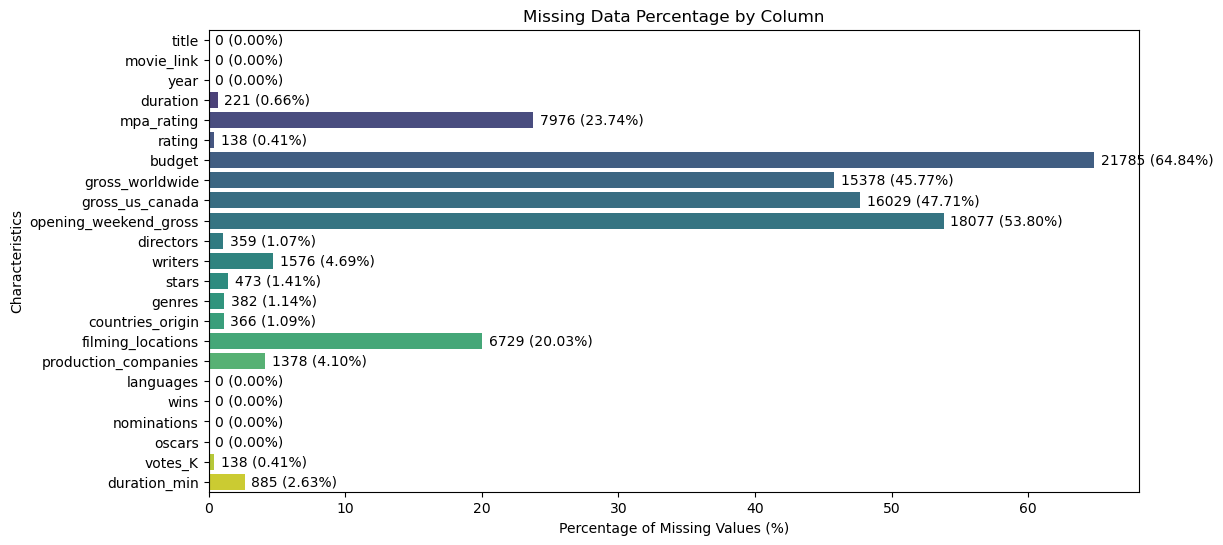

In [110]:
#Missing values according to characteristics 

missing_values = merged_df.isna().sum()
missing_percent = (missing_values / len(merged_df)) * 100

missing_df = pd.DataFrame({'Column': missing_values.index, 'Missing Count': missing_values.values, 'Missing %': missing_percent.values})

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df["Missing %"], y=missing_df["Column"], palette="viridis")

for i, row in missing_df.iterrows():
    plt.text(row['Missing %'] + 0.5, i, f"{row['Missing Count']} ({row['Missing %']:.2f}%)", 
             va='center', ha='left', color='black', fontsize=10)
    
plt.xlabel("Percentage of Missing Values (%)")
plt.ylabel("Characteristics")
plt.title("Missing Data Percentage by Column")
plt.show()

This dataset contains a significant amount of missing values, particularly in key financial fields such as budget and grossWorldWide. Since these fields are crucial for analyzing box office performance and profitability, we must be extremely cautious when drawing conclusions.

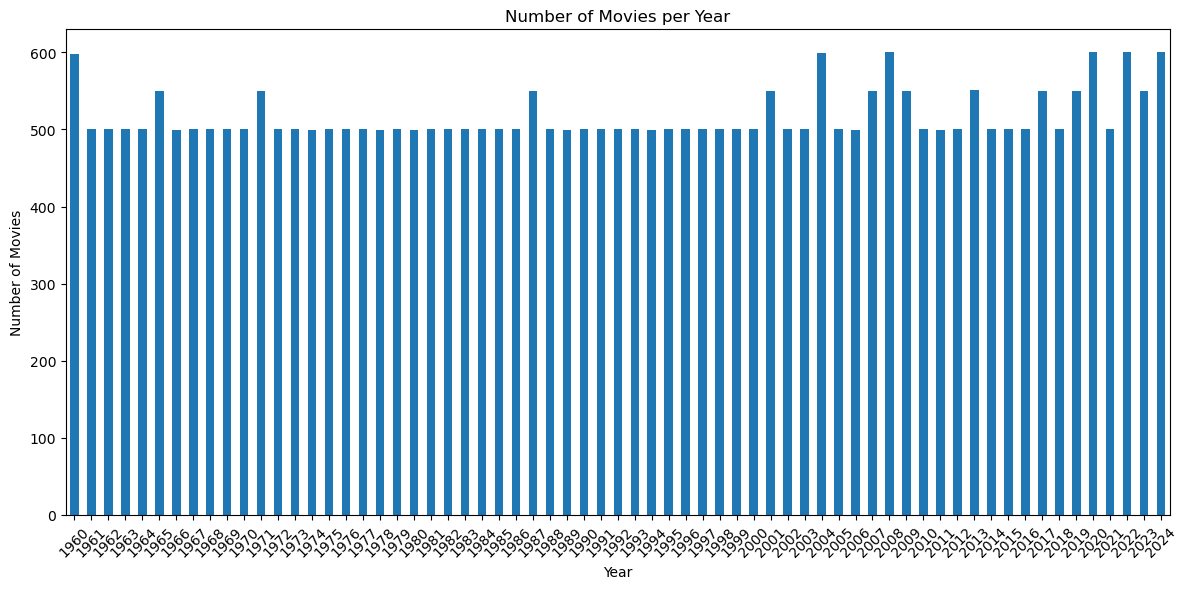

In [113]:
# Number of movies per year 

movies_per_year = merged_df.groupby("year").size()

# Plotting the data
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar')

# Adding titles and labels
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_40784\1833177006.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = merged_df.groupby("year").apply(lambda x: x.isnull().sum().sum())  # Total missing values per year


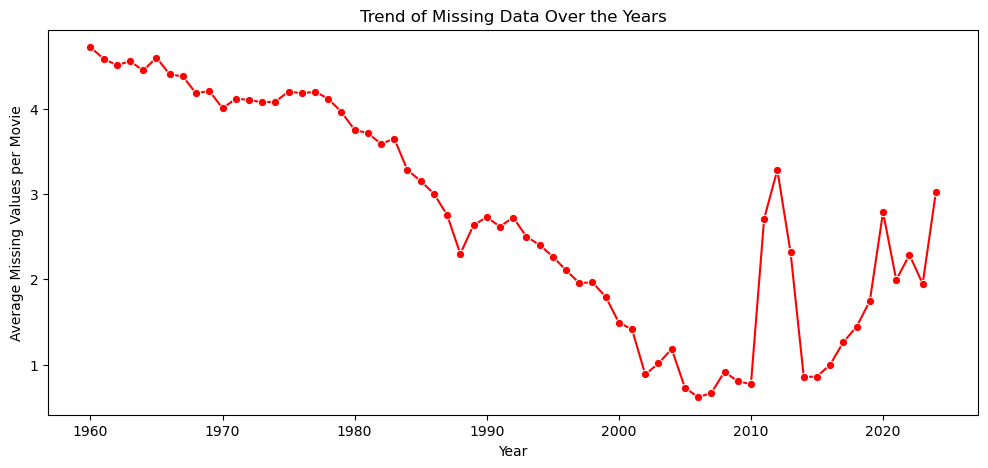

In [114]:
#Trend of Missing Data Over the Years

missing_by_year = merged_df.groupby("year").apply(lambda x: x.isnull().sum().sum())  # Total missing values per year
missing_by_year = missing_by_year / merged_df.groupby("year").size()  # Normalize by number of movies that year

# Plot missing data trend over the years
plt.figure(figsize=(12, 5))
sns.lineplot(x=missing_by_year.index, y=missing_by_year, marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Average Missing Values per Movie")
plt.title("Trend of Missing Data Over the Years")
plt.show()

The dataset considers consistently around 500–600 movies per year. The number of missing values decreases between 1960 and 2010, with a noticeable spike at the beginning of the 2010s. Since then, there has been a growing trend of missing values.Those missing values may impact the reliability of analyses thus we have to remain cautious when drawing conclusions, especially when dealing with years that have a higher frequency of missing values.

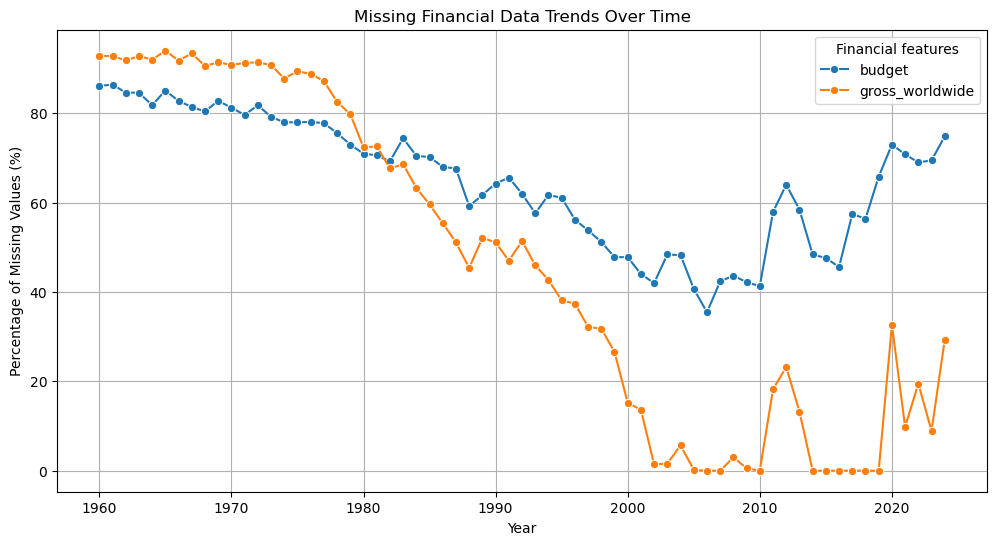

In [116]:
financial_cols = ['budget', 'gross_worldwide']

missing_financial = merged_df.groupby('year')[financial_cols].apply(lambda x: x.isna().mean() * 100)

plt.figure(figsize=(12, 6))
for col in financial_cols:
    sns.lineplot(x=missing_financial.index, y=missing_financial[col], label=col, marker='o')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Percentage of Missing Values (%)")
plt.title("Missing Financial Data Trends Over Time")
plt.legend(title="Financial features")
plt.grid(True)

plt.show()

We observe that, even though we need to be cautious with the increasing missing values in recent years, the grossWorldWide data is actually quite well-covered overall. However, budget and grossWorldWide data are particularly unreliable before the 2000s, with a significantly high proportion of missing values.

In [117]:
# Analyze unrealistic values (eg.negative budget, extremely high outliers...) 
#to do

### Some insights 

In [118]:
#to do 

## 4. Related Work

Several research studies have explored movie success factors using IMDb and box office data. Some key references include:

- Lash & Zhao (2016): Analysis of IMDb ratings and their correlation with box office revenue.
- Eliashberg et al. (2006): Predicting movie success using machine learning models.
- Ghiassi et al. (2015): The impact of marketing strategies on movie profitability.
-IMDB Research: Various case studies on user ratings and audience engagement.

Our project will build upon these works by leveraging a larger dataset spanning over 60 years, incorporating both financial and audience-based metrics to derive insights into long-term trends in the film industry.